<a href="https://colab.research.google.com/github/g-roger/natural-language-process/blob/main/IA_NLP_1_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv('https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv', delimiter=';', encoding='utf-8')

In [3]:
df.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       4080 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  4080 non-null   object
dtypes: object(3)
memory usage: 95.8+ KB


In [5]:
df.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Bonecos Brinquedo Vingadores 30 Cm Com Luz E...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,game
freq,20,39,1020


In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       2916 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  2916 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [8]:
dist_categorias = df[['nome', 'categoria']].groupby('categoria').count()

In [9]:
dist_categorias.rename(columns={'nome': 'quantidade'}, inplace=True)

In [10]:
dist_categorias['frequencia'] = dist_categorias.apply(lambda x: (x/sum(dist_categorias.quantidade)) * 100)

In [11]:
dist_categorias

,quantidade,frequencia
categoria,,
brinquedo,668,22.908093
game,622,21.330590
livro,838,28.737997
maquiagem,788,27.023320


In [12]:
dist_categorias.sum()

quantidade    2916.0
frequencia     100.0
dtype: float64

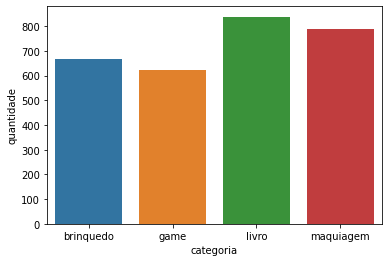

In [13]:
sns.barplot(x=dist_categorias.index, y=dist_categorias.quantidade)

In [14]:
df.descricao.values

array(['Produto NovoBilbo Bolseiro é um hobbit que leva uma vida confortável e sem ambições. Mas seu contentamento é perturbado quando Gandalf, o mago, e uma companhia de anões batem à sua porta e levam-no para uma expedição. Eles têm um plano para roubar o tesouro guardado por Smaug, o Magnífico, um grande e perigoso dragão. Bilbo reluta muito em participar da aventura, mas acaba surpreendendo até a si mesmo com sua esperteza e sua habilidade como ladrão!CaracterísticasAutor: Tolkien, J. R. R.Peso: 0.44I.S.B.N.: 9788578277109Altura: 20.000000Largura: 13.000000Profundidade: 1.000000Número de Páginas: 328Idioma: PortuguêsAcabamento: BrochuraNúmero da edição: 7Ano da edição: 2013',
       'Produto NovoDurante as férias escolares de 1958, em Derry, pacata cidadezinha do Maine, Bill, Richie, Stan, Mike, Eddie, Ben e Beverly aprenderam o real sentido da amizade, do amor, da confiança e... do medo. O mais profundo e tenebroso medo. Naquele verão, eles enfrentaram pela primeira vez a Coisa, u

In [15]:
# df['top_10_palavras_desc'] = df.descricao.apply(lambda x: sorted(Counter(x.split(' ')), reverse=True)[:10])

In [16]:
df['top_10_palavras_desc'] = df.descricao.apply(lambda x: (Counter(x.split(' ')).most_common(10)))

In [17]:
df

,nome,descricao,categoria,top_10_palavras_desc
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,"[(e, 5), (um, 3), (uma, 3), (o, 3), (sua, 3), ..."
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,"[(a, 7), (de, 6), (o, 5), (eles, 5), (que, 5),..."
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,"[(de, 8), (e, 7), (dos, 6), (A, 5), (a, 4), (d..."
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,"[(de, 41), (a, 36), (e, 32), (que, 31), (o, 27..."
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,"[(de, 20), (a, 11), (que, 10), (o, 6), (uma, 6..."
...,...,...,...,...
4073,Red Dead Redemption Edição Do Ano Goty Xbox 3...,Red Dead Redemption Edição Do Ano Goty Xbox 36...,game,"[(Xbox, 4), (Dead, 3), (Redemption, 3), (Red, ..."
4074,Jogo Gta 5 Grand Theft Auto V Ps4 Mídia Cd + ...,Game: GTA V - Grand Theft Auto FiveEspecificaç...,game,"[(-, 6), (de, 6), (01, 3), (Idioma, 2), (do, 2..."
4075,Zelda: Breath Of The Wild - Expansion Pass - ...,ENVIO IMEDIATO APÓS CONFIRMAÇÃOCom este Passe ...,game,"[(para, 5), (o, 5), (e, 5), (de, 4), (uma, 4),..."
4078,Gta San Andreas Hd Remastered Ps3 Envio Imedi...,Nome do jogo: GTA San Andreas HD RemasterConso...,game,"[(do, 4), (a, 3), (da, 2), (de, 2), (ou, 2), (..."


In [18]:
def contar_qtd(x):
  if x[0] in x[1]:
    return x[1].count(x[0])
  return 0

In [19]:
df['count_cat_na_desc'] = df[['categoria', 'descricao']].apply(contar_qtd, axis=1)

In [20]:
df

,nome,descricao,categoria,top_10_palavras_desc,count_cat_na_desc
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,"[(e, 5), (um, 3), (uma, 3), (o, 3), (sua, 3), ...",0
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,"[(a, 7), (de, 6), (o, 5), (eles, 5), (que, 5),...",0
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,"[(de, 8), (e, 7), (dos, 6), (A, 5), (a, 4), (d...",2
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,"[(de, 41), (a, 36), (e, 32), (que, 31), (o, 27...",1
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,"[(de, 20), (a, 11), (que, 10), (o, 6), (uma, 6...",0
...,...,...,...,...,...
4073,Red Dead Redemption Edição Do Ano Goty Xbox 3...,Red Dead Redemption Edição Do Ano Goty Xbox 36...,game,"[(Xbox, 4), (Dead, 3), (Redemption, 3), (Red, ...",0
4074,Jogo Gta 5 Grand Theft Auto V Ps4 Mídia Cd + ...,Game: GTA V - Grand Theft Auto FiveEspecificaç...,game,"[(-, 6), (de, 6), (01, 3), (Idioma, 2), (do, 2...",0
4075,Zelda: Breath Of The Wild - Expansion Pass - ...,ENVIO IMEDIATO APÓS CONFIRMAÇÃOCom este Passe ...,game,"[(para, 5), (o, 5), (e, 5), (de, 4), (uma, 4),...",0
4078,Gta San Andreas Hd Remastered Ps3 Envio Imedi...,Nome do jogo: GTA San Andreas HD RemasterConso...,game,"[(do, 4), (a, 3), (da, 2), (de, 2), (ou, 2), (...",0


In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import itertools
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [22]:
df.top_10_palavras_desc

0       [(e, 5), (um, 3), (uma, 3), (o, 3), (sua, 3), ...
1       [(a, 7), (de, 6), (o, 5), (eles, 5), (que, 5),...
2       [(de, 8), (e, 7), (dos, 6), (A, 5), (a, 4), (d...
3       [(de, 41), (a, 36), (e, 32), (que, 31), (o, 27...
4       [(de, 20), (a, 11), (que, 10), (o, 6), (uma, 6...
                              ...                        
4073    [(Xbox, 4), (Dead, 3), (Redemption, 3), (Red, ...
4074    [(-, 6), (de, 6), (01, 3), (Idioma, 2), (do, 2...
4075    [(para, 5), (o, 5), (e, 5), (de, 4), (uma, 4),...
4078    [(do, 4), (a, 3), (da, 2), (de, 2), (ou, 2), (...
4079    [(de, 12), (o, 8), (com, 6), (e, 5), (que, 4),...
Name: top_10_palavras_desc, Length: 2916, dtype: object

In [23]:
text = list(df.top_10_palavras_desc)
text = itertools.chain(*text)

text = list(text)

In [24]:
words = [] 
for i in list(text):
    words.append(i[0])

In [25]:
text = ' '.join(words)

In [26]:
text

'e um uma o sua da é de para edição: a de o eles que em do e da os de e dos A a do ao Crônicas Gelo Fogo de a e que o Harry Potter um é da de a que o uma e para da do Langdon de e a sua o  que Christian Grey não de ao da dos mais Produto NovoO Silmarillion, relata acontecimentos de um e que adultos com livro para O Pequeno de em mais Lorraine do que e dos da é a de um e que em do uma O da a do de os entrega da é MATERIAL DIGITAL Coleção de a e o eles que em do os Derry, DE ORGANIZADOS DO EM O NO CAMPO PERGUNTAS E TAMBEM the and de Journal with of Produto Novo e Físico e de para que uma Ninja AUTO-IQ sua alimentação dos de a o e uma um da jeitos usar boca de e que é um a em do o depois de uma um é e o que ele - tem de a que e o da em se Maddox uma de e a um para uma em o ou dia de o que – e uma do a John autor de a e o que em no é qual mundo de do a o que e não A Mia com de a por O diário John dos Para que Dean, de e o a é em uma da do que e que em uma para um é eles a Basta de x Produt

In [27]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)
                      

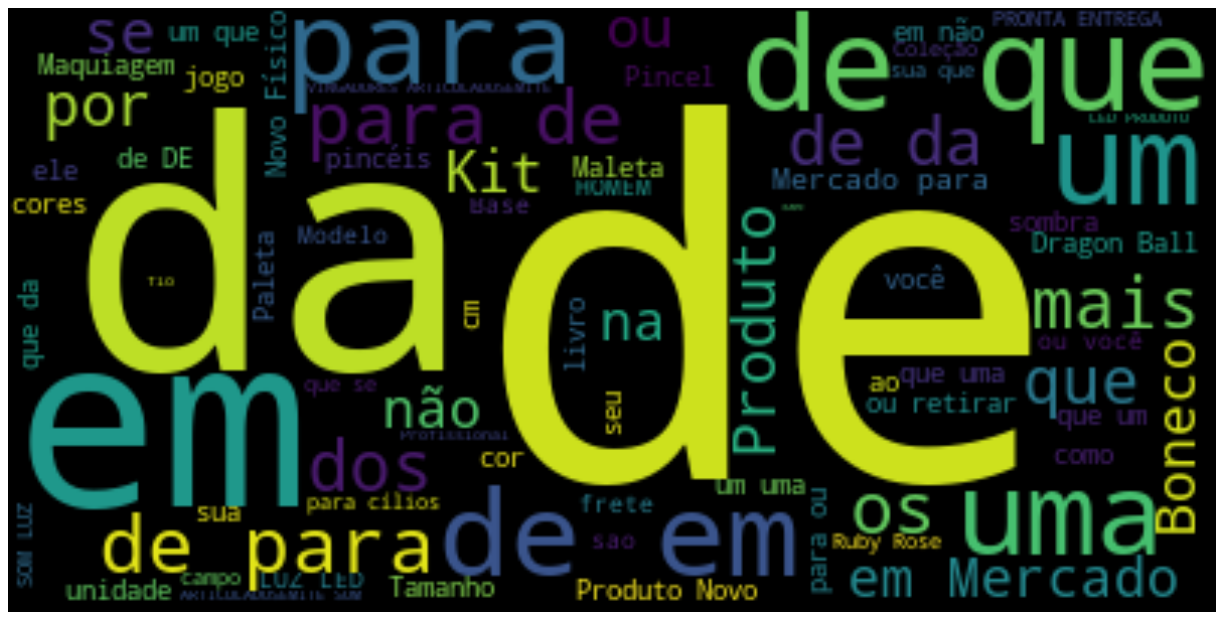

In [28]:
figure(figsize=(20, 10), dpi=80)

plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

Aula 2

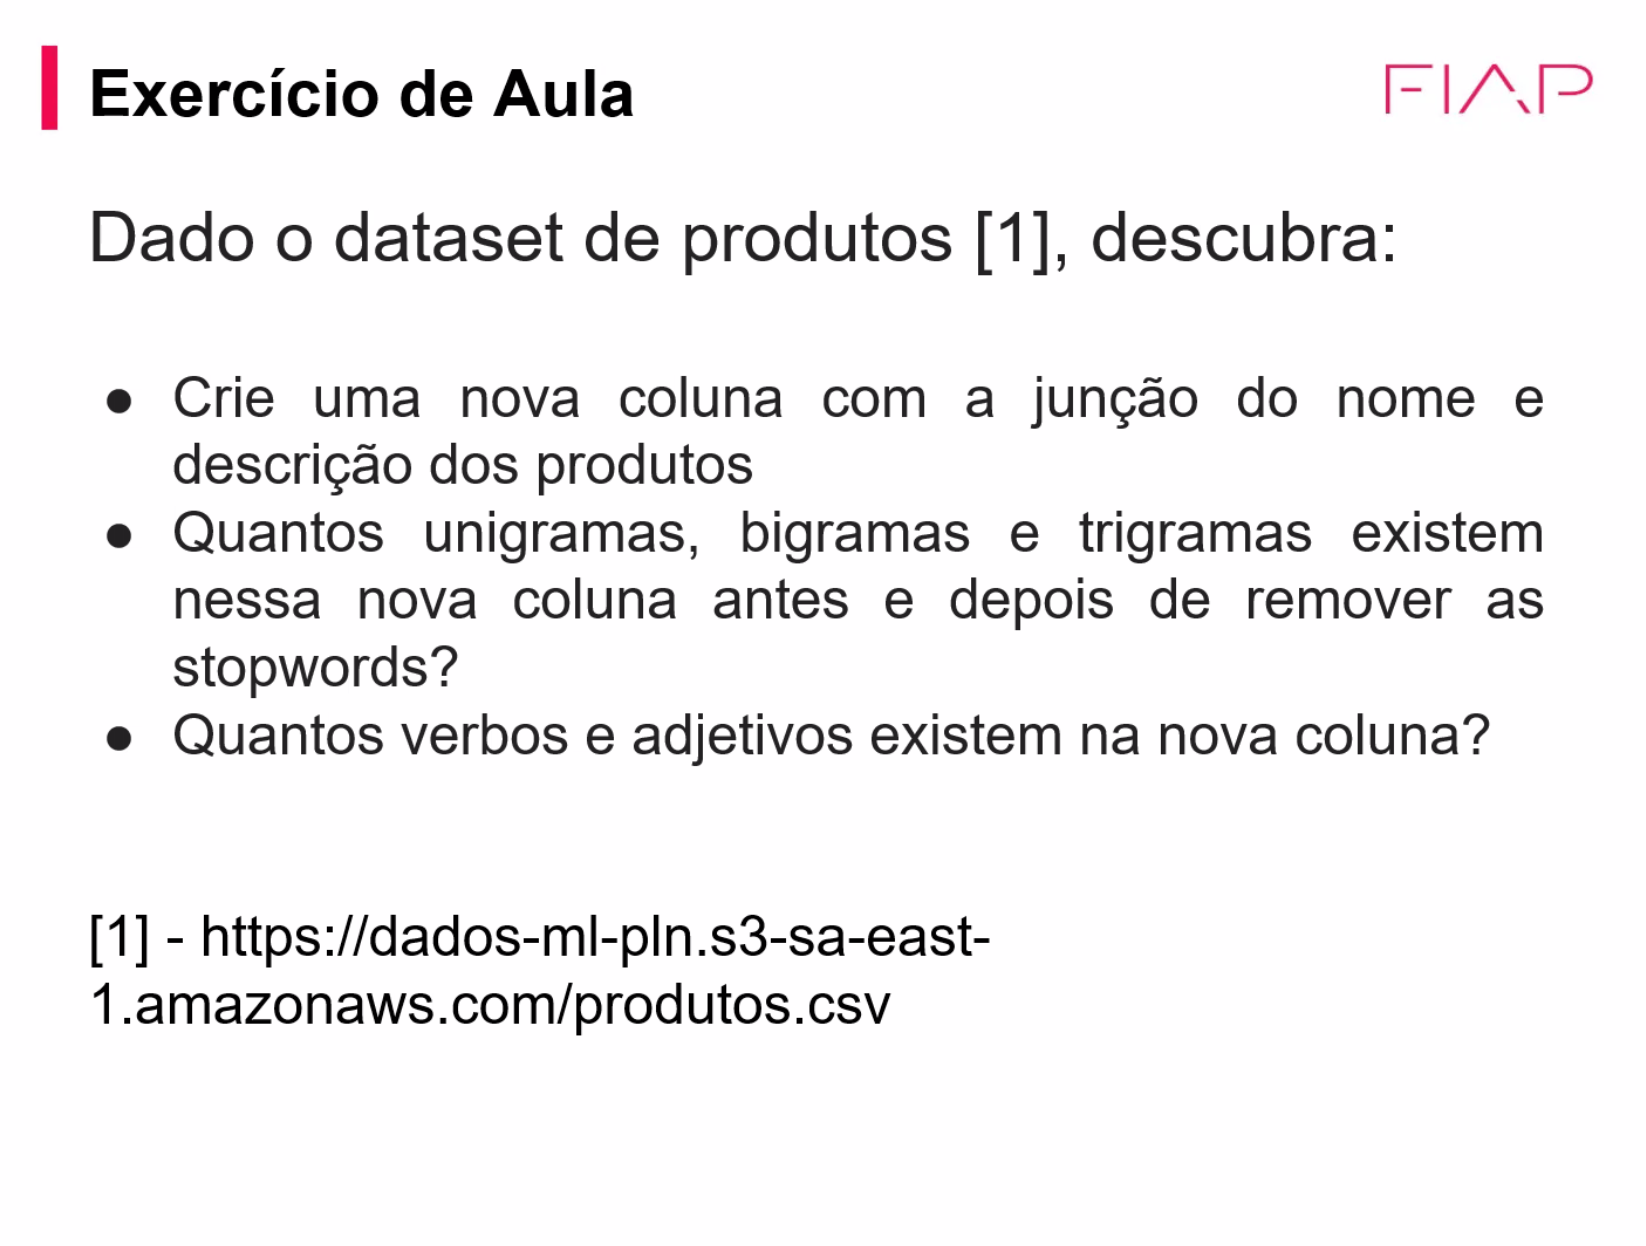

In [33]:
df['nam_desc'] = df['nome'] + df['descricao']
df.head()

,nome,descricao,categoria,top_10_palavras_desc,count_cat_na_desc,nam_desc
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,"[(e, 5), (um, 3), (uma, 3), (o, 3), (sua, 3), ...",0,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bols...
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,"[(a, 7), (de, 6), (o, 5), (eles, 5), (que, 5),...",0,Livro - It A Coisa - Stephen King Produto Nov...
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,"[(de, 8), (e, 7), (dos, 6), (A, 5), (a, 4), (d...",2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,"[(de, 41), (a, 36), (e, 32), (que, 31), (o, 27...",1,Box Harry Potter Produto Novo e Físico A sér...
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,"[(de, 20), (a, 11), (que, 10), (o, 6), (uma, 6...",0,Livro Origem - Dan Brown Produto NovoDe Onde ...


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

nltk.download('stopwords')

stops = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [69]:
stops[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [81]:
unigram = CountVectorizer(ngram_range=(1,1))
unigram.fit(df.nam_desc)
text_unigram = vect.transform(df.nam_desc)
print('Sem stopWords', len(unigram.get_feature_names()))

unigram_com_stops = CountVectorizer(ngram_range=(1,1), stop_words=stops)
unigram_com_stops.fit(df.nam_desc)
text_unigram = vect.transform(df.nam_desc)
print('Com stopWords:', len(unigram_com_stops.get_feature_names()))

Sem stopWords 35466
Com stopWords: 35310


In [79]:
bigram = CountVectorizer(ngram_range=(2,2))
bigram.fit(df.nam_desc)
text_bigram = vect.transform(df.nam_desc)
print('Sem stopWords', len(bigram.get_feature_names()))

bigram_com_stops = CountVectorizer(ngram_range=(2,2), stop_words=stops)
bigram_com_stops.fit(df.nam_desc)
text_bigram = vect.transform(df.nam_desc)
print('Com stopWords:', len(bigram_com_stops.get_feature_names()))

Sem stopWords 159553
Com stopWords: 145409


In [80]:
trigram = CountVectorizer(ngram_range=(3,3))
trigram.fit(df.nam_desc)
text_trigram = vect.transform(df.nam_desc)
print('Sem stopWords', len(trigram.get_feature_names()))

trigram_com_stops = CountVectorizer(ngram_range=(3,3), stop_words=stops)
trigram_com_stops.fit(df.nam_desc)
text_trigram = vect.transform(df.nam_desc)
print('Com stopWords:', len(trigram_com_stops.get_feature_names()))

Sem stopWords 228162
Com stopWords: 177869


In [84]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [86]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [100]:
df['tokens'] = df.nam_desc.apply(word_tokenize)
df

,nome,descricao,categoria,top_10_palavras_desc,count_cat_na_desc,nam_desc,tokens
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,"[(e, 5), (um, 3), (uma, 3), (o, 3), (sua, 3), ...",0,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bols...,"[O, Hobbit, -, 7ª, Ed, ., 2013, Produto, NovoB..."
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,"[(a, 7), (de, 6), (o, 5), (eles, 5), (que, 5),...",0,Livro - It A Coisa - Stephen King Produto Nov...,"[Livro, -, It, A, Coisa, -, Stephen, King, Pro..."
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,"[(de, 8), (e, 7), (dos, 6), (A, 5), (a, 4), (d...",2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,"[Box, As, Crônicas, De, Gelo, E, Fogo, Pocket,..."
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,"[(de, 41), (a, 36), (e, 32), (que, 31), (o, 27...",1,Box Harry Potter Produto Novo e Físico A sér...,"[Box, Harry, Potter, Produto, Novo, e, Físico,..."
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,"[(de, 20), (a, 11), (que, 10), (o, 6), (uma, 6...",0,Livro Origem - Dan Brown Produto NovoDe Onde ...,"[Livro, Origem, -, Dan, Brown, Produto, NovoDe..."
...,...,...,...,...,...,...,...
4073,Red Dead Redemption Edição Do Ano Goty Xbox 3...,Red Dead Redemption Edição Do Ano Goty Xbox 36...,game,"[(Xbox, 4), (Dead, 3), (Redemption, 3), (Red, ...",0,Red Dead Redemption Edição Do Ano Goty Xbox 3...,"[Red, Dead, Redemption, Edição, Do, Ano, Goty,..."
4074,Jogo Gta 5 Grand Theft Auto V Ps4 Mídia Cd + ...,Game: GTA V - Grand Theft Auto FiveEspecificaç...,game,"[(-, 6), (de, 6), (01, 3), (Idioma, 2), (do, 2...",0,Jogo Gta 5 Grand Theft Auto V Ps4 Mídia Cd + ...,"[Jogo, Gta, 5, Grand, Theft, Auto, V, Ps4, Míd..."
4075,Zelda: Breath Of The Wild - Expansion Pass - ...,ENVIO IMEDIATO APÓS CONFIRMAÇÃOCom este Passe ...,game,"[(para, 5), (o, 5), (e, 5), (de, 4), (uma, 4),...",0,Zelda: Breath Of The Wild - Expansion Pass - ...,"[Zelda, :, Breath, Of, The, Wild, -, Expansion..."
4078,Gta San Andreas Hd Remastered Ps3 Envio Imedi...,Nome do jogo: GTA San Andreas HD RemasterConso...,game,"[(do, 4), (a, 3), (da, 2), (de, 2), (ou, 2), (...",0,Gta San Andreas Hd Remastered Ps3 Envio Imedi...,"[Gta, San, Andreas, Hd, Remastered, Ps3, Envio..."


In [101]:
tags = df.tokens.apply(pos_tag, tagset='universal', lang='pt-br')

In [102]:
tags[1]

[('Livro', 'NOUN'),
 ('-', '.'),
 ('It', 'PRON'),
 ('A', 'DET'),
 ('Coisa', 'NOUN'),
 ('-', '.'),
 ('Stephen', 'NOUN'),
 ('King', 'NOUN'),
 ('Produto', 'NOUN'),
 ('NovoDurante', 'NOUN'),
 ('as', 'ADP'),
 ('férias', 'ADJ'),
 ('escolares', 'NOUN'),
 ('de', 'ADP'),
 ('1958', 'NUM'),
 (',', '.'),
 ('em', 'X'),
 ('Derry', 'NOUN'),
 (',', '.'),
 ('pacata', 'NOUN'),
 ('cidadezinha', 'NOUN'),
 ('do', 'VERB'),
 ('Maine', 'NOUN'),
 (',', '.'),
 ('Bill', 'NOUN'),
 (',', '.'),
 ('Richie', 'NOUN'),
 (',', '.'),
 ('Stan', 'NOUN'),
 (',', '.'),
 ('Mike', 'NOUN'),
 (',', '.'),
 ('Eddie', 'NOUN'),
 (',', '.'),
 ('Ben', 'NOUN'),
 ('e', 'VERB'),
 ('Beverly', 'NOUN'),
 ('aprenderam', 'NOUN'),
 ('o', 'NOUN'),
 ('real', 'ADJ'),
 ('sentido', 'NOUN'),
 ('da', 'NOUN'),
 ('amizade', 'NOUN'),
 (',', '.'),
 ('do', 'VERB'),
 ('amor', 'ADV'),
 (',', '.'),
 ('da', 'NOUN'),
 ('confiança', 'NOUN'),
 ('e', 'NOUN'),
 ('...', '.'),
 ('do', 'VERB'),
 ('medo', 'NOUN'),
 ('.', '.'),
 ('O', 'NOUN'),
 ('mais', 'VERB'),
 ('pro

verbos: VERB
adjetivos: ADJ

In [111]:
items = tags.apply(lambda x: x[1][1]) 

In [115]:
items.value_counts()

NOUN    2349
NUM      294
.        119
ADP       81
DET       27
VERB      14
CONJ       9
ADJ        9
PRT        9
PRON       5
Name: tokens, dtype: int64